<a href="https://colab.research.google.com/github/Mrinmayi03/Android_App_Python/blob/main/stock_prediction_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Getting the data for a stock from the start date to the end date
start_date = '2010-01-01'
end_date = '2024-07-15'

stock_symbol = "GOOG"

data = yf.download(stock_symbol , start_date , end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   15.615220   15.678981   15.547723   15.610239   15.592496   
2010-01-05   15.620949   15.637387   15.480475   15.541497   15.523831   
2010-01-06   15.588072   15.588072   15.102393   15.149715   15.132495   
2010-01-07   15.178109   15.193053   14.760922   14.797037   14.780218   
2010-01-08   14.744733   15.024933   14.672753   14.994298   14.977255   
...                ...         ...         ...         ...         ...   
2024-07-08  191.365005  191.679001  189.320007  190.479996  190.479996   
2024-07-09  191.750000  192.860001  190.229996  190.440002  190.440002   
2024-07-10  190.750000  193.309998  190.619995  192.660004  192.660004   
2024-07-11  191.339996  192.410004  186.820007  187.300003  187.300003   
2024-07-12  186.919998  188.690002  186.139999  186.779999  186.779999   

               Volume  
Date         

In [4]:
#Add new index(0,1,2,...) instead of date column:
data.reset_index(inplace = True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.592496,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.523831,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.132495,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.780218,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.977255,189680313
...,...,...,...,...,...,...,...
3650,2024-07-08,191.365005,191.679001,189.320007,190.479996,190.479996,12097600
3651,2024-07-09,191.750000,192.860001,190.229996,190.440002,190.440002,10198500
3652,2024-07-10,190.750000,193.309998,190.619995,192.660004,192.660004,12052900
3653,2024-07-11,191.339996,192.410004,186.820007,187.300003,187.300003,16452000


In [6]:
#We will be using the method of moving averages:
#Moving averages --> Calculate the value for the past 10 days and based on that value predict the value for the 11th day

#Calculating the moving average for 100 days and then plotting it:
mov_avg_100_days = data.Close.rolling(100).mean()

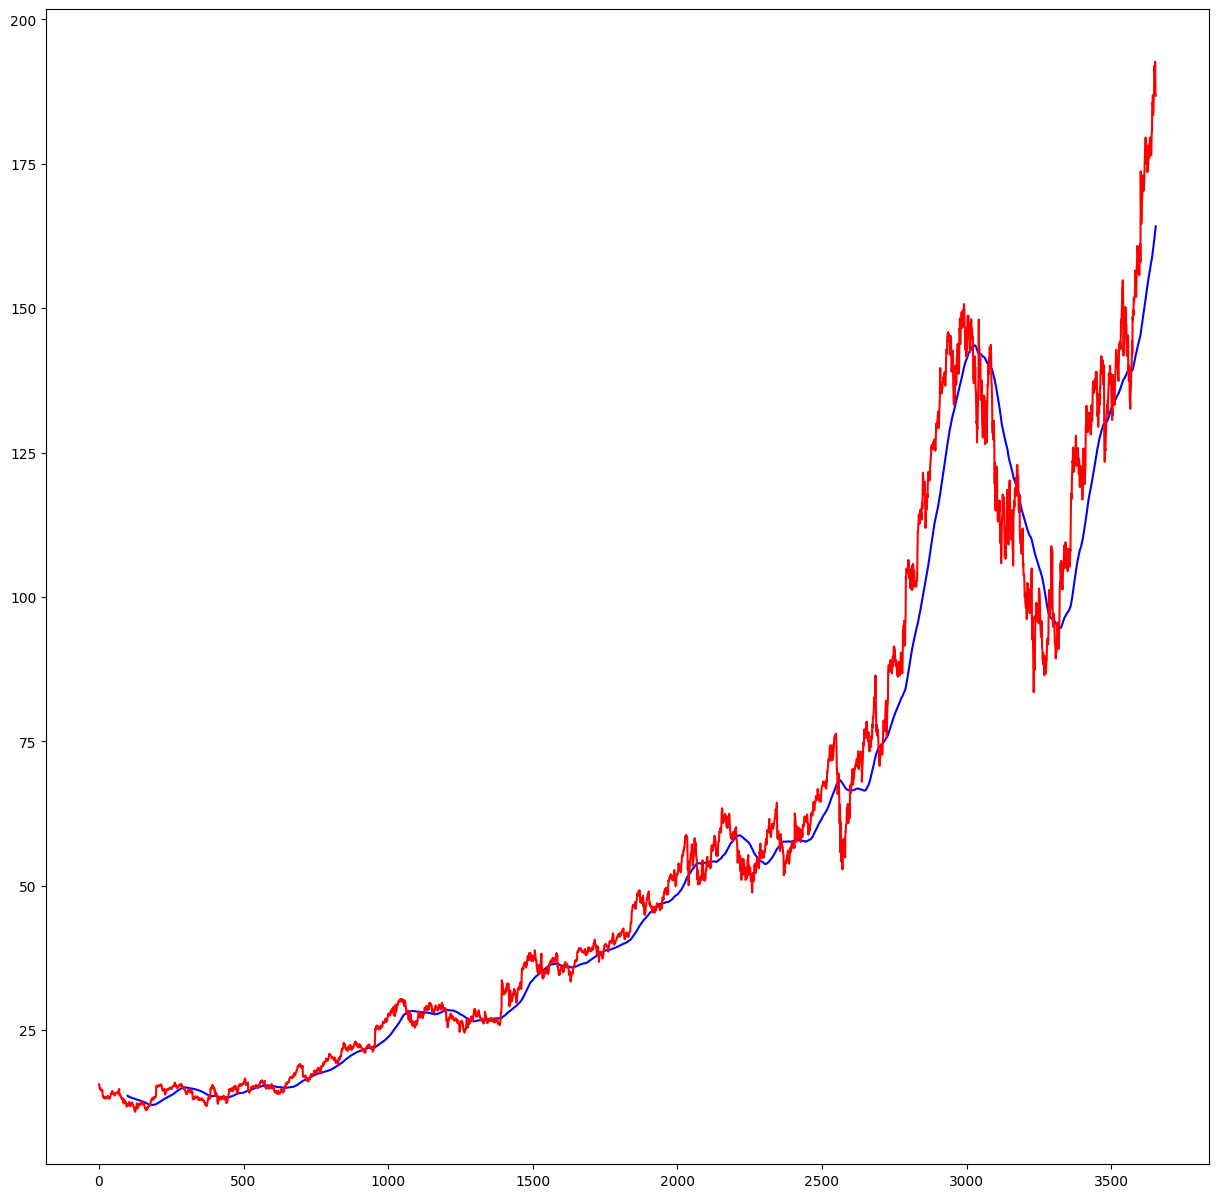

In [7]:
#Plotting:
plt.figure(figsize=(15,15))
plt.plot(mov_avg_100_days , 'b')
plt.plot(data.Close , 'r')
plt.show()

In [8]:
#Checking for null values:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
close_data = data[['Close']]

In [10]:
close_data

,Close
0,15.610239
1,15.541497
2,15.149715
3,14.797037
4,14.994298
...,...
3650,190.479996
3651,190.440002
3652,192.660004
3653,187.300003


In [11]:
train_data , test_data = train_test_split(close_data , test_size=0.2, shuffle=False)

In [12]:
print("Number of rows in the training data: " , train_data.shape[0])
print("Number of rows in the testing data: " , test_data.shape[0])

Number of rows in the training data:  2924
Number of rows in the testing data:  731


In [13]:
train_data

,Close
0,15.610239
1,15.541497
2,15.149715
3,14.797037
4,14.994298
...,...
2919,138.001999
2920,138.096497
2921,137.689499
2922,138.389496


In [14]:
test_data

,Close
2924,138.916000
2925,137.300507
2926,136.570007
2927,136.913498
2928,138.436996
...,...
3650,190.479996
3651,190.440002
3652,192.660004
3653,187.300003


In [15]:
#Normalizing the training data:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_data_scaled = scaler.fit_transform(train_data)

In [17]:
#Now, applying the concept of moving averages on the scaled training data:
x = []
y = []

for i in range(100 , train_data_scaled.shape[0]):
    x.append(train_data_scaled[i-100 : i])
    y.append(train_data_scaled[i , 0])

#### EXPLAINATION OF WHAT THE LOOP ABOVE DOES. [taken from chatgpt]

# Initialize lists to hold sequences and targets
x = []
y = []

# Create sequences with a window size of 5
window_size = 5

# Loop through the data to create the input sequences and corresponding targets
for i in range(window_size, train_data_scaled.shape[0]):
    x.append(train_data_scaled[i-window_size:i])
    y.append(train_data_scaled[i])

# Convert lists to numpy arrays for better handling
x = np.array(x)
y = np.array(y)

# Print the resulting sequences and targets
print("x (input sequences):")
print(x)
print("\ny (targets):")
print(y)
Output:
The above code will produce the following output:

python
Copy code
x (input sequences):
[[0.1  0.15 0.2  0.25 0.3 ]
 [0.15 0.2  0.25 0.3  0.35]
 [0.2  0.25 0.3  0.35 0.4 ]
 [0.25 0.3  0.35 0.4  0.45]
 [0.3  0.35 0.4  0.45 0.5 ]
 [0.35 0.4  0.45 0.5  0.55]
 [0.4  0.45 0.5  0.55 0.6 ]
 [0.45 0.5  0.55 0.6  0.65]
 [0.5  0.55 0.6  0.65 0.7 ]
 [0.55 0.6  0.65 0.7  0.75]
 [0.6  0.65 0.7  0.75 0.8 ]
 [0.65 0.7  0.75 0.8  0.85]
 [0.7  0.75 0.8  0.85 0.9 ]
 [0.75 0.8  0.85 0.9  0.95]
 [0.8  0.85 0.9  0.95 1.  ]
 [0.85 0.9  0.95 1.   1.05]
 [0.9  0.95 1.   1.05 1.1 ]
 [0.95 1.   1.05 1.1  1.15]
 [1.   1.05 1.1  1.15 1.2 ]
 [1.05 1.1  1.15 1.2  1.25]
 [1.1  1.15 1.2  1.25 1.3 ]
 [1.15 1.2  1.25 1.3  1.35]
 [1.2  1.25 1.3  1.35 1.4 ]
 [1.25 1.3  1.35 1.4  1.45]
 [1.3  1.35 1.4  1.45 1.5 ]
 [1.35 1.4  1.45 1.5  1.55]
 [1.4  1.45 1.5  1.55 1.6 ]
 [1.45 1.5  1.55 1.6  1.65]
 [1.5  1.55 1.6  1.65 1.7 ]
 [1.55 1.6  1.65 1.7  1.75]
 [1.6  1.65 1.7  1.75 1.8 ]
 [1.65 1.7  1.75 1.8  1.85]
 [1.7  1.75 1.8  1.85 1.9 ]
 [1.75 1.8  1.85 1.9  1.95]
 [1.8  1.85 1.9  1.95 2.  ]
 [1.85 1.9  1.95 2.   2.05]
 [1.9  1.95 2.   2.05 2.1 ]
 [1.95 2.   2.05 2.1  2.15]
 [2.   2.05 2.1  2.15 2.2 ]
 [2.05 2.1  2.15 2.2  2.25]
 [2.1  2.15 2.2  2.25 2.3 ]
 [2.15 2.2  2.25 2.3  2.35]
 [2.2  2.25 2.3  2.35 2.4 ]
 [2.25 2.3  2.35 2.4  2.45]
 [2.3  2.35 2.4  2.45 2.5 ]]

y (targets):
[0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.
 1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7
 1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4
 2.45 2.5 ]



In this example, each element in x is a sequence of 5 values from train_data_scaled, and each corresponding element in y is the value immediately following the sequence. This setup is used to train models for time series forecasting, where the model learns to predict the next value in the sequence based on the previous values.

In [21]:
x , y = np.array(x) , np.array(y)

In [22]:
print("X is: " , x)
print("\nY is: " , y)

X is:  [[[0.0368774 ]
  [0.03634362]
  [0.03330144]
  ...
  [0.00794678]
  [0.00792938]
  [0.00761994]]

 [[0.03634362]
  [0.03330144]
  [0.03056291]
  ...
  [0.00792938]
  [0.00761994]
  [0.01051899]]

 [[0.03330144]
  [0.03056291]
  [0.03209463]
  ...
  [0.00761994]
  [0.01051899]
  [0.00958487]]

 ...

 [[0.70893392]
  [0.70714404]
  [0.71272322]
  ...
  [0.97974503]
  [0.98724602]
  [0.98797979]]

 [[0.70714404]
  [0.71272322]
  [0.70965602]
  ...
  [0.98724602]
  [0.98797979]
  [0.98481947]]

 [[0.71272322]
  [0.70965602]
  [0.70938428]
  ...
  [0.98797979]
  [0.98481947]
  [0.99025492]]]

Y is:  [0.01051899 0.00958487 0.0089544  ... 0.98481947 0.99025492 0.99038312]


In [23]:
#CREATING THE MODEL FROM HERE ON:

In [24]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True, input_shape = (x.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [29]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = [ "accuracy"])

In [30]:
model.fit(x , y , epochs = 25 , batch_size = 32 , verbose = 1)

Epoch 1/25
89/89 [==============================] - 34s 312ms/step - loss: 0.0021 - accuracy: 7.0822e-04
Epoch 2/25
89/89 [==============================] - 28s 312ms/step - loss: 0.0017 - accuracy: 7.0822e-04
Epoch 3/25
89/89 [==============================] - 28s 314ms/step - loss: 0.0019 - accuracy: 7.0822e-04
Epoch 4/25
89/89 [==============================] - 28s 312ms/step - loss: 0.0016 - accuracy: 7.0822e-04
Epoch 5/25
89/89 [==============================] - 28s 312ms/step - loss: 0.0016 - accuracy: 7.0822e-04
Epoch 6/25
89/89 [==============================] - 34s 375ms/step - loss: 0.0018 - accuracy: 7.0822e-04
Epoch 7/25
89/89 [==============================] - 28s 315ms/step - loss: 0.0017 - accuracy: 7.0822e-04
Epoch 8/25
89/89 [==============================] - 28s 314ms/step - loss: 0.0017 - accuracy: 7.0822e-04
Epoch 9/25
89/89 [==============================] - 28s 314ms/step - loss: 0.0016 - accuracy: 7.0822e-04
Epoch 10/25
89/89 [==============================] - 29

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

#We get the last 100 days from the train dataset and add it to the test dataset because that is how the model works. For it to predict the first day value in the test set , it must have past 100 days because we are using moving averages method.

In [32]:
past_100_days = train_data.tail(100)

test_data = pd.concat([past_100_days , test_data] , ignore_index = True)

In [33]:
test_data

,Close
0,102.252998
1,102.218002
2,101.777496
3,102.797501
4,102.777000
...,...
826,190.479996
827,190.440002
828,192.660004
829,187.300003


In [34]:
#Scaling this data between 0 and 1:
test_data_scaled = scaler.fit_transform(test_data)

#Now, applying the concept of moving averages on the scaled training data:
x = []
y = []

for i in range(100 , test_data_scaled.shape[0]):
    x.append(test_data_scaled[i-100 : i])
    y.append(test_data_scaled[i , 0])

In [35]:
x , y = np.array(x) , np.array(y)

In [36]:
y_predict = model.predict(x)

23/23 [==============================] - 5s 144ms/step


In [37]:
y_predict

array([[0.514655  ],
       [0.5170635 ],
       [0.5193268 ],
       [0.5211637 ],
       [0.52243906],
       [0.5233203 ],
       [0.52431107],
       [0.5258932 ],
       [0.5283767 ],
       [0.5317366 ],
       [0.53601277],
       [0.54122365],
       [0.5472318 ],
       [0.5538156 ],
       [0.560501  ],
       [0.5668988 ],
       [0.57281315],
       [0.57807124],
       [0.5825796 ],
       [0.58596075],
       [0.5881728 ],
       [0.58934355],
       [0.589908  ],
       [0.5901639 ],
       [0.5899495 ],
       [0.58883417],
       [0.5866629 ],
       [0.58367443],
       [0.58032674],
       [0.5771368 ],
       [0.574347  ],
       [0.5714094 ],
       [0.5676955 ],
       [0.56277645],
       [0.55692077],
       [0.55031323],
       [0.5434669 ],
       [0.53701115],
       [0.5316206 ],
       [0.5278232 ],
       [0.5256896 ],
       [0.5247559 ],
       [0.5246365 ],
       [0.5254095 ],
       [0.52713704],
       [0.5298908 ],
       [0.5336834 ],
       [0.538

In [40]:
#Now, converting these scaled values back to their original values:
value_scaled_by = 1/scaler.scale_

Therefore , 109.1700058 was the value that all the values were divided by to get the scaled values

In [41]:
y_predict = y_predict*value_scaled_by

In [42]:
y = y*value_scaled_by

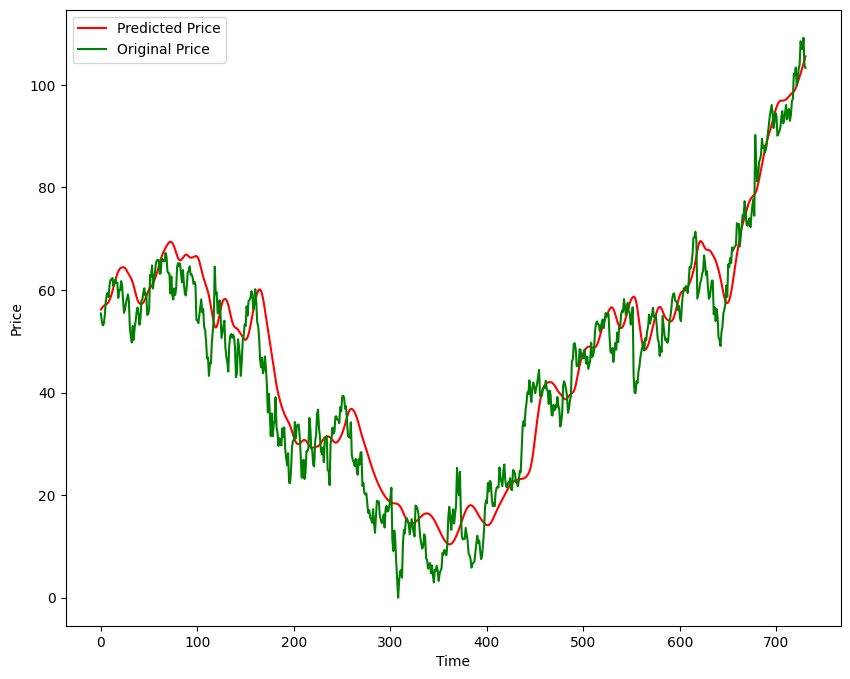

In [43]:
plt.figure(figsize = (10,8))
plt.plot(y_predict , 'r' , label="Predicted Price")
plt.plot(y , 'g' , label = "Original Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()